## Analyse der Timelag-Ergebnisse
Dieser Notebook-Abschnitt lädt die Timelag-Metriken (F1 und AUCPR) für zwei Modelle (LSTM & Transformer) und visualisiert deren Entwicklung über verschiedene Zeitfenster.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei laden
df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Results.csv", sep=';')

df['Timelag'] = df['Timelag'].astype(int)
df.sort_values(by='Timelag', inplace=True)

In [2]:
def plot_metric_over_timelag(metric_prefix, ylabel, title):
    plt.figure(figsize=(10, 6))

    # Definierte Farbpaletten
    colors = {
        'Transformer': sns.color_palette("Reds", n_colors=4)[1:],
        'LSTM': sns.color_palette("Blues", n_colors=4)[1:]
    }

    colors = {
        'Transformer': ['#FF3E1B', '#C9021D', '#94040C'],  # hellrot, mittelrot, dunkelrot
        'LSTM': ['#40F6FF', '#3383C9', '#1725C9']          # hellblau, mittelblau, dunkelblau
    }

    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        for i, split in enumerate(['Training', 'Validation', 'Testing']):
            plt.plot(subset['Timelag'],
                     subset[f"{metric_prefix} {split}"],
                     marker='o',
                     label=f"{model} - {split}",
                     color=colors[model][i])

    plt.xlabel("Timelag")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

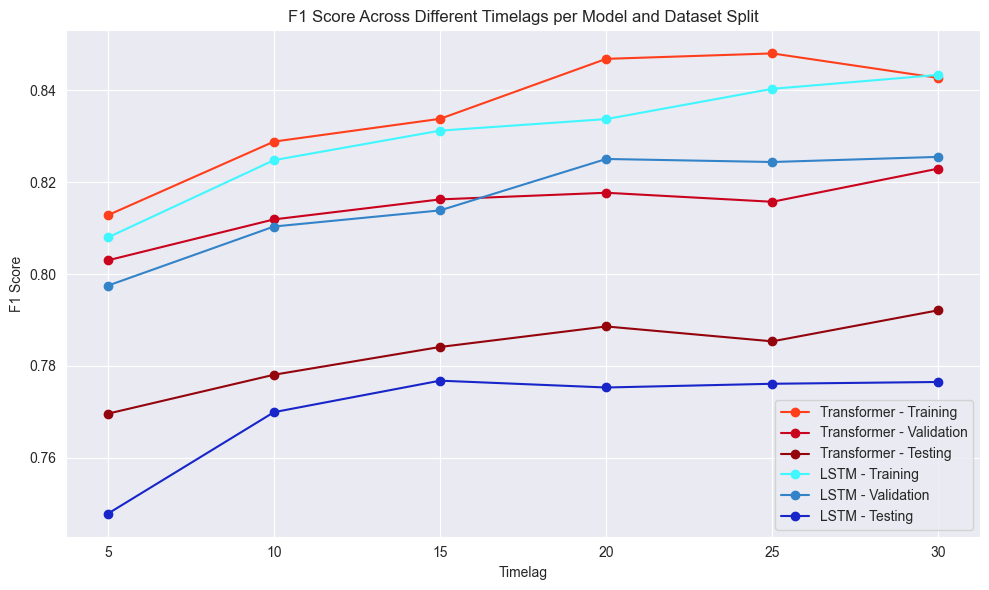

In [3]:
plot_metric_over_timelag('F1', 'F1 Score', 'F1 Score Across Different Timelags per Model and Dataset Split')

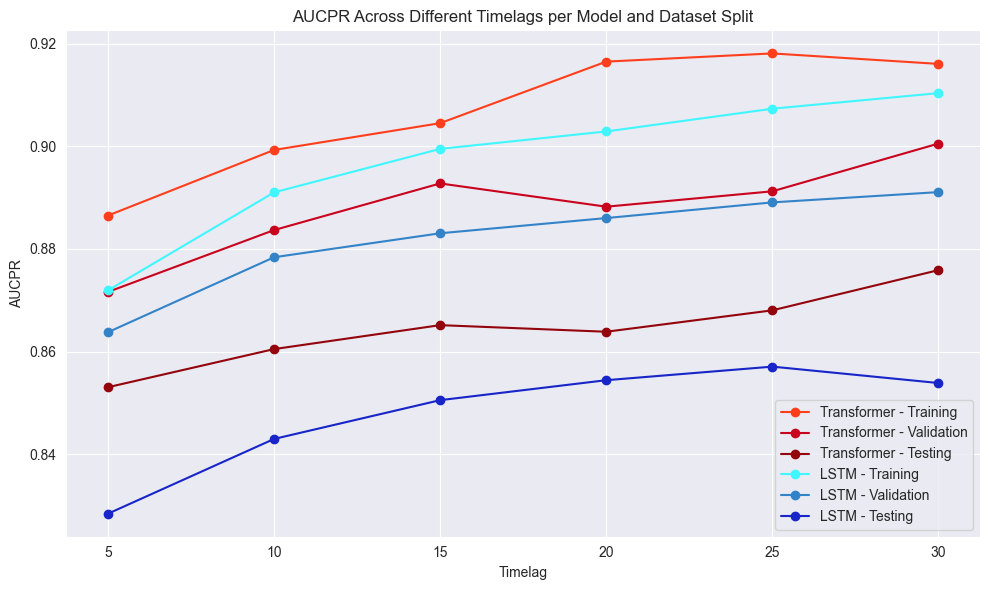

In [4]:
# AUCPR-Plot
plot_metric_over_timelag('AUCPR', 'AUCPR', 'AUCPR Across Different Timelags per Model and Dataset Split')